# Linear Regression
Linear Regression is a statistical modeling technique that is used to estimate the relationship between variables. The linear function $ \mathbf{y = \beta_0 +  \beta_1{x}} $ defines a relationship between the independent or predictor variable x and the dependent or response variable y. This post uses machine learning to implement linear regression.

Using weather data, this post first presents a linear regression between temperature (predictor) and humidity (response). It then presents a linear regression model using multiple independent variables, temperature and wind speed. The results are then compared with the results from the same model by using sklearn library. The objective of this post is to show the calculations involved in using machine learning to build a linear regression model.

Click <a href="https://github.com/dagarwal98/linearRegression/blob/master/LinearRegression.pdf">here</a> for an article on simple linear regression.

If you would like to learn more on machine learning, I will recommend a course on <a href="https://www.coursera.org/learn/machine-learning">machine learning</a> by Andrew Ng on Coursera.

## Load Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import os
from sklearn.linear_model import LinearRegression
from mpl_toolkits import mplot3d

In [68]:
def load_data(filename, rows=10):
    """
    Reads csv file and loads specified columns

    Arguments:
        filename -- full path with filename
        rows -- number of rows to load
    Returns:
        dataframe
    """

    df = pd.read_csv(filename, usecols=["Temperature (C)", "Humidity", "Wind Speed (km/h)"], 
                       na_values=["nan"], nrows=rows)
    return df


def normalize(data):
    """
    Normalizes each column of the data matrix using mean and standard deviation.

    Arguments:
        data -- matrix of data to be normalized
    Returns:
        normalized data matrix
    """
    data_mean = data.mean(axis=0)
    data_std = data.std(axis=0)
    return (data -  data_mean) / data_std

def prepare_data(df, x_col, y_col):
    """
    prepare x and y values

    Arguments:
        df -- pandas dataframe
        x_col -- name of x column(s)
        y_col -- name of y column
    Returns:
        x_data -- dataframe for x values
        y_data -- dataframe for y values
    """
    # Dependent variable: humidity
#     y_temp = df.loc[:, y_col]
    y_data = df.loc[:, y_col]
    
    # Independent variable: Temperature
    x_data = df.loc[:, x_col]

    return x_data, y_data

def hx(x, theta):
    """
    Calculates sigmoid of X and theta

    Arguments:
        x -- input matrix
        theta -- vector of regression parameters
    Returns:
        sigmoid vector
    """
    return np.dot(x, theta)

    
def loss(theta0, theta1, x, y):
    """
    Calculates loss

    Arguments:
        theta0 -- first parameter of linear function
        theta1 -- second parameter of linear function
        x -- input matrix
        y -- output values
    Returns:
        loss value
    """
    n = x.shape[0]
    total_loss = np.sum(((theta0 + theta1 * x) - y)**2)
    return total_loss/(2*n)

def loss_vector(theta, x, y, regrate):
    """
    Vectorize the loss calculation and also implementing regularization

    Arguments:
        theta -- vector of regression parameters; dimension (d,1)
        x -- input matrix; dimenstion (n, d)
        y -- labels

    Returns:
        sigmoid vector; dimension (n, 1)
    """    
    m = y.size
    a = hx(x, theta) - y
    return ((1/(2*m) * np.dot(a.T, a)) + ((regrate/(2*m)) * np.dot(theta.T, theta)))


def run_model(x, y, num_iter = 1000):
    """
    Run logistic regression. Use gradient descent to find model parameters.

    Arguments:
        x -- input matrix
        y -- labels
        num_iter -- number of times to iterate to find model parameters
    Returns:
        theta0 -- first model parameter
        theta1 -- second model parameter
        loss -- list of loss values
    """
    theta0 = 0
    theta1 = 0
    alpha = 0.005
    x = np.array(x)
    y = np.array(y)
    
    loss_val = loss(theta0, theta1, x, y)
    m = x.shape[0]
    costs = []
    
    for k in range(num_iter):
        temp0 = 0
        temp1 = 0
        theta0_prev = theta0
        theta1_prev = theta1

        value = (theta0 + theta1 * x) - y
        temp0 = np.sum(value)
        temp1 = np.sum(np.dot(value, x))
        
        theta0 -= alpha * (1/m) * temp0
        theta1 -= alpha * (1/m) * temp1
        loss_new = loss(theta0, theta1, x, y)
        costs.append(loss_new)
        
        if k % 1000 == 0:
            print (k, theta0, theta1, loss_new)
        
        loss_val = loss_new

    # print value from last iteration
    print (k, theta0, theta1, loss_new)
    
    return theta0, theta1, costs

            
def run_multi_model(x, y, num_iter = 1000, regrate = 0):
    """
    Run logistic regression. Use gradient descent to find model parameters.

    Arguments:
        x -- input matrix; dimension (n, d)
        y -- labels; dimension (n, 1)
        num_iter -- number of times to iterate to find model parameters
        regrate -- regularization rate
    Returns:
        theta -- model parameter; dimension (d, 1)
        loss -- list of loss values
    """    
    # initialize theta with zeros
    theta = np.zeros((x.shape[1], 1))

    alpha = 0.0055
    loss_val = 0
    m = y.shape[0]
    costs = []

    for k in range(num_iter):
        theta_prev = theta

        # calculate loss
        # using .item() to get the value from arrays to plot later 
        loss_new = loss_vector(theta, x, y, regrate).item()
        costs.append(loss_new)
        loss_val = loss_new
        
        # calc gradient descent
        theta = theta - alpha * ((1/m) * np.dot(x.T, (hx(x, theta) - y)) + (regrate / m) * theta)

        if k % 1000 == 0:
            print(k, np.ravel(theta), loss_val)
            
    # print value from last iteration
    print(k, np.ravel(theta), loss_val)
    
    return theta, costs

# Step 1: Load data

In [4]:
# load data. The load_data function returns a pandas dataframe object.
df_data = load_data("./data/weatherHistory.csv", rows=100000)
df_data.dropna()

print(df_data.shape)
print(df_data.head())

(96453, 3)
   Temperature (C)  Humidity  Wind Speed (km/h)
0         9.472222      0.89            14.1197
1         9.355556      0.86            14.2646
2         9.377778      0.89             3.9284
3         8.288889      0.83            14.1036
4         8.755556      0.83            11.0446


# Step 2: Prepare data

In [5]:
x, y = prepare_data(df_data, "Temperature (C)", "Humidity")
print("x: ", x.shape)
print("y: ", y.shape)

x:  (96453,)
y:  (96453,)


# Step 3: Run model
Parameters theta0 and theta1 for logistic regression is determined using gradient descent.

In [6]:
theta0, theta1, costs = run_model(x, y, num_iter = 10000)
print()
print("Theta0: {}".format(str(theta0)))
print("Theta1: {}".format(str(theta1)))
print("Loss: {}".format(str(costs[-1])))

0 0.004041944314847645 0.04173874924056276 0.1749413590759216
1000 0.7855551601111661 -0.007631397233221256 0.013569042066155522
2000 0.8771464118124911 -0.012317445421241758 0.01149643997732933
3000 0.8878740862394536 -0.01286630132588723 0.011468007211221305
4000 0.8891305708542306 -0.012930586367776949 0.011467617159414972
5000 0.889277737287918 -0.012938115787750018 0.011467611808531732
6000 0.8892949742353105 -0.01293899767509837 0.011467611735126226
7000 0.8892969931220079 -0.012939100966626487 0.01146761173411922
8000 0.8892972295851941 -0.012939113064702064 0.011467611734105406
9000 0.8892972572810713 -0.01293911448169564 0.011467611734105213
9999 0.8892972605240427 -0.012939114647614545 0.011467611734105211

Theta0: 0.8892972605240427
Theta1: -0.012939114647614545
Loss: 0.011467611734105211


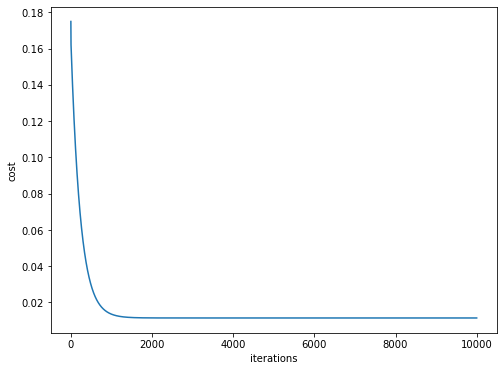

In [7]:
# plot cost 
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 8
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size
plt.show()
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations')
plt.show()

## Plot scatterplot
Plot regression line using theta values obtained from the model
Plot regression line using numpy polyfit function
Both lines show similar values.

-0.012939114669679652 0.8892972609553152


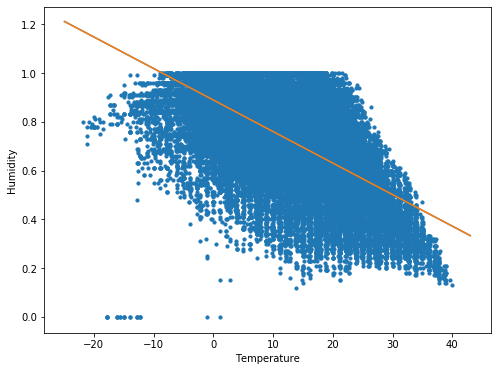

In [13]:
# Plot scatterplot
# Plot regression line using theta values obtained from the model
# Plot regression line using numpy polyfit function
df = df_data.iloc[:, [0,1]]
x1 = df.iloc[:,0]
y1 = df.iloc[:,1]
plt.scatter(x1, y1, s=10)
plt.xlabel('Temperature')
plt.ylabel('Humidity')
#plt.show()
fig_size = plt.rcParams["figure.figsize"]

axes = plt.gca()
m, b = np.polyfit(x1, y1, 1)
print (m,b)
X_plot = np.linspace(axes.get_xlim()[0],axes.get_xlim()[1],100)
plt.plot(X_plot, m*X_plot + b, '-')
plt.plot(X_plot, theta1*X_plot + theta0, '-')

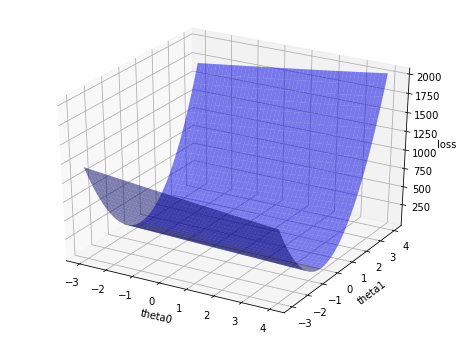

In [9]:
# Surface plot for loss values for different values of x and y

fig = plt.figure()
ax = fig.gca(projection='3d')
t0 = np.linspace(-3, 4, num=50)
t1 = np.linspace(-3, 4, num=50)
t0, t1 = np.meshgrid(t0, t1)

zs = np.array([loss(a, b, x, y) 
               for a, b in zip(np.ravel(t0), np.ravel(t1))])
Z = zs.reshape(t0.shape)

ax.plot_surface(t0, t1, Z, rstride=1, cstride=1, color='b', alpha=0.5)
ax.set_xlabel('theta0')
ax.set_ylabel('theta1')
ax.set_zlabel('loss')
plt.show()

# Linear regression using sklearn

In [10]:
from sklearn.linear_model import LinearRegression

x, y = prepare_data(df_data, "Temperature (C)", "Humidity")
print("x: ", x.shape)
print("y: ", y.shape)

x = np.array(x)
y = np.array(y)
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)
regression_model = LinearRegression()
# Fit the data
regression_model.fit(x, y)
print('Slope:' ,regression_model.coef_)
print('Intercept:', regression_model.intercept_)
print("loss: ", loss(regression_model.intercept_, regression_model.coef_, x, y))

x:  (96453,)
y:  (96453,)
Slope: [[-0.01293911]]
Intercept: [0.88929726]
loss:  0.011467611734105211


## Comparison
The parameter values received from the regression model matches with the ones received from sklearn:

<table>
    <tr>
        <td>Parameters</td>
        <td>Model</td>
        <td>sklearn</td>
    </tr>
    <tr>
        <td>Theta0</td>
        <td>0.88929726</td>
        <td>0.88929726</td>
    </tr>    
    <tr>
        <td>Theta1</td>
        <td>-0.01293911</td>
        <td>-0.01293911</td>
    </tr> 
    <tr>
        <td>Loss</td>
        <td>0.011467611</td>
        <td>0.011467611</td>
    </tr> 

</table>



# Linear Regression for multiple features

In [69]:
"""
Impelement Linear Regression for multiple features using vectorization
Vectorization makes the calculation much faster
"""
# prepare x and y data
x, y = prepare_data(df_data, ["Temperature (C)", "Wind Speed (km/h)"], "Humidity")

# # reshape to dimension m, 1
y = np.array(y)
y = y.reshape(-1,1)

#add ones to x array - to help with matrix multiplication
x = np.c_[np.ones(x.shape[0]),x]
print(x.shape)

# Here, regularization is set to zero. You can try other values.
theta, costs = run_multi_model(x, y, num_iter = 10000, regrate = 0)

print()
for i, t in enumerate(theta):
    print("Theta{}: {}".format(str(i), str(t)))

print("Loss: {}".format(str(costs[-1])))

(96453, 3)
0 [0.00404194 0.04173875 0.04202401] 0.2891428431464027
1000 [ 0.63994469 -0.00468435  0.0080917 ] 0.020608489360651513
2000 [ 0.85111192 -0.01017538 -0.001462  ] 0.011654652459302018
3000 [ 0.92112424 -0.01199593 -0.00462953] 0.010670403209585094
4000 [ 0.94433677 -0.01259953 -0.00567972] 0.010562209750597426
5000 [ 0.95203287 -0.01279965 -0.00602791] 0.010550316599984332
6000 [ 0.9545845  -0.01286601 -0.00614335] 0.010549009247092303
7000 [ 0.95543049 -0.012888   -0.00618162] 0.010548865536511322
8000 [ 0.95571098 -0.0128953  -0.00619431] 0.01054884973914612
9000 [ 0.95580398 -0.01289772 -0.00619852] 0.010548848002622992
9999 [ 0.95583479 -0.01289852 -0.00619991] 0.010548847811788043

Theta0: [0.95583479]
Theta1: [-0.01289852]
Theta2: [-0.00619991]
Loss: 0.010548847811788043


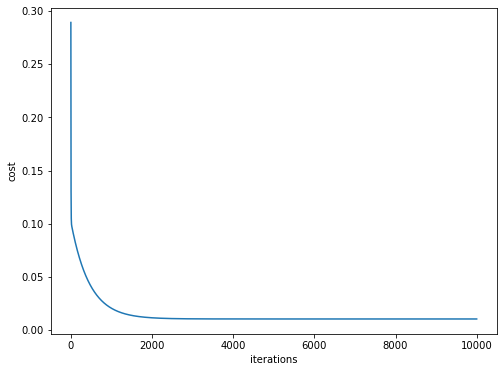

In [70]:
# plot cost 
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 8
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size
plt.show()
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations')
plt.show()

# Linear Regression for multiple features using sklearn

In [105]:
"""
Impelement Linear Regression for multiple features using sklearn
"""
# using sklearn
from sklearn.linear_model import LinearRegression

# prepare x and y data
x, y = prepare_data(df_data, ["Temperature (C)", "Wind Speed (km/h)"], "Humidity")

model = LinearRegression()
model.fit(x, y)

print('Slope:' , model.coef_)
print('Intercept:', model.intercept_)

# create theta array from model parameters
a = model.intercept_
b = model.coef_
a = a.reshape(-1,1)
b = b.reshape(-1,1)
y = np.array(y)
y = y.reshape(-1,1)
theta_estimated = np.concatenate((a, b), axis=0)
print(theta_estimated)

# add ones to x to use loss_vector function
x = np.c_[np.ones(x.shape[0]),x]
print("loss:", loss_vector(theta_estimated, x, y, 0))

Slope: [-0.01289891 -0.00620061]
Intercept: 0.955850101853013
[[ 0.9558501 ]
 [-0.01289891]
 [-0.00620061]]
loss: [[0.01054885]]


## Comparison
The parameter values received from the regression model matches with the ones received from sklearn:

<table>
    <tr>
        <td>Parameters</td>
        <td>Model</td>
        <td>sklearn</td>
    </tr>
    <tr>
        <td>Theta0</td>
        <td>0.9558347</td>
        <td>0.9558501</td>
    </tr>    
    <tr>
        <td>Theta1</td>
        <td>-0.01289852</td>
        <td>-0.01289891</td>
    </tr> 
    <tr>
        <td>Theta2</td>
        <td>-0.00619991</td>
        <td>-0.00620061</td>
    </tr>     
    <tr>
        <td>Loss</td>
        <td>0.01054885</td>
        <td>0.01054885</td>
    </tr> 

</table>
